In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from glob import glob
from wordcloud import WordCloud
from tqdm import tqdm
import pickle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import copy
from random import sample
from matplotlib.pyplot import figure

In [48]:
#Mounting drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
file1 = open("/content/drive/MyDrive/IR_Tweets_Data/twitter_base_preprocessed.pkl", "rb")
tweets_data = pickle.load(file1)
file1.close()

In [64]:
tweets_data

,author id,created_at,geo,country,country_code,place_full_name,place_name,place_type,id,lang,...,source,tweet,hashtags,sensitive,urls,context_text,context_probability,context_type,Preprocessed_Data,Date_Only
0,1952510090.0,2022-02-14 00:11:44+00:00,,,,,,,1493015060943454208.0,en,...,Twitter for Android,ð¥ð¥ð¥ð¥ð¥ð¥ð¥â¤µï¸â¤µï¸â¤µï¸...,"CommonSenseGunLaws,GunControlNow,GunSafes,GunS...",False,https://t.co/LjkEup24Dk,,0.0,,[ð¥ð¥ð¥ð¥ð¥ð¥ð¥â¤µï¸â¤µï¸â¤µï¸...,2022-02-14
1,20453105.0,2022-02-14 00:04:56+00:00,,,,,,,1493013352938934272.0,en,...,Twitter for Android,"It's too bad these guys are afraid of needles,...","ClownConvoy,FreeDumbConvoy,OttawaOccupied",False,https://t.co/MmFzuFjIDR,,0.0,,"[bad, guy, afraid, needle, twinrix, would, pre...",2022-02-14
2,1492660754998247424.0,2022-02-14 00:39:55+00:00,,,,,,,1493022155239534336.0,en,...,Twitter for Android,Cowboy dressed as #Furries now available at th...,"Furries,RamRanch,OttawaOccupied",False,https://t.co/GBuBCUtpXe,,0.0,,"[cowboy, dressed, furries, available, ramranch...",2022-02-14
3,117812637.0,2022-02-14 00:20:05+00:00,,,,,,,1493017163485044736.0,en,...,Twitter for iPhone,We blocked these trucks from entering the dntn...,"Riverside,OttawaOccupied",False,https://t.co/KzLkBZvjgD,,0.0,,"[blocked, truck, entering, dntn, core, riversi...",2022-02-14
4,1490044524604928000.0,2022-02-14 00:10:26+00:00,,,,,,,1493014734903382016.0,en,...,Twitter for iPhone,Krista is very pleased with how the @RCMPONT r...,"FluTruxKlanGoHome,OttawaOccupied,kkkonvoy,Otta...",False,https://t.co/kAm5KNugdA,,0.0,,"[krista, pleased, rcmpont, responded, maskless...",2022-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1215620000000000000.0,2022-03-01 17:19:03+00:00,,,,,,,1498710000000000000.0,en,...,Twitter Web App,â ï¸Yesterday @IPCC_CH published its latest ...,"ClimateReport,ClimateChange",False,,,0.0,,"[â, ï¸yesterday, ipccch, published, latest, ...",2022-03-01
26578,1492710000000000000.0,2022-03-01 19:32:32+00:00,,,,,,,1498740000000000000.0,en,...,Twitter for Android,"This MahaShivRatri ,let's all come together to...","MagicOfSoil,Conciousplanet,Mahashivratri",False,"https://t.co/SNGFeG5vph,https://t.co/bVaXubpcxx",,0.0,,"[mahashivratri, let, s, come, together, offer,...",2022-03-01
26580,1158780000000000000.0,2022-03-01 20:05:20+00:00,,,,,,,1498750000000000000.0,en,...,Twitter for Android,The awakening night of #Mahashivratri is purel...,"Mahashivratri,Adiyogi,LordShiva,SaveSoil",False,"https://t.co/tX0vIBnwBn,https://t.co/tX0vIBnwB...",,0.0,,"[awakening, night, mahashivratri, purely, peac...",2022-03-01
26581,18812221.0,2022-03-01 21:13:28+00:00,,,,,,,1498770000000000000.0,en,...,Twitter Web App,FIFA 22- Title Update #7 (PS5) https://t.co/Ka...,"FIFA22,FUT22,FIFA,FUT,FIFA22TitleUpdate,TitleU...",False,https://t.co/KaCNwRKqG6,,0.0,,"[fifa, 22, title, update, 7, ps5, http, tcokac...",2022-03-01


- Sparse data columns

In [51]:
empty_geo_location = len(tweets_data[tweets_data['geo'] == ''].index)
empty_country = len(tweets_data[tweets_data['country'] == ''].index)
print("Records with empty geo location: ", empty_geo_location)
print("Records with empty country: ", empty_country)
filled_geo_location = tweets_data.shape[0] - empty_geo_location

Records with empty geo location:  218317
Records with empty country:  218322


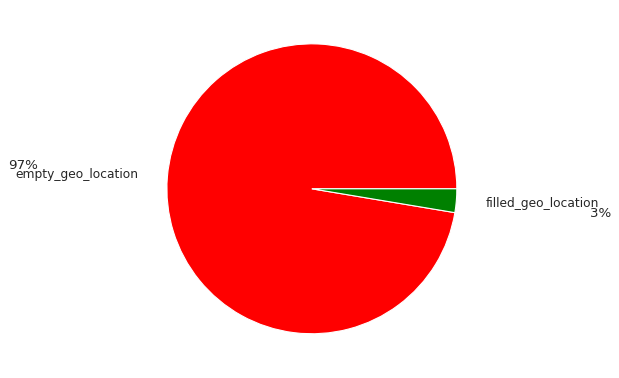

In [52]:
figure(figsize=(8, 6), dpi=80)
y = np.array([empty_geo_location, filled_geo_location])
mylabels = ["empty_geo_location", "filled_geo_location"]
mycolors = ["red", "green"]
plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.0f%%', pctdistance=2.0, labeldistance=1.2)
plt.show() 

## Data Distribution



- Method of tweeting

In [53]:
posting_device_count = {}

for index, row in tweets_data.iterrows():
  # print(row['region'])
  if row['source'] in posting_device_count:
    posting_device_count[row['source']] += 1
  else:
    posting_device_count[row['source']] = 1

print("Devices used by to post tweet: ", posting_device_count.keys())
print("Count: ", len(posting_device_count.keys()),"\n")

region_count = {k: v / total for total in (sum(posting_device_count.values()),) for k, v in posting_device_count.items()}
sorted_dict = {k: v for k, v in sorted(region_count.items(), key=lambda item: item[1], reverse = True)}

Devices used by to post tweet:  dict_keys(['Twitter for Android', 'Twitter for iPhone', 'Twitter for iPad', 'Twitter Web App', 'TweetDeck', 'Twitter Media Studio', 'Twitter', 'Sprout Social', 'Hootsuite Inc.', 'Instagram', 'TweetDeck Web App', 'WeatherFairy App', 'Thryv', 'ocio_educativo', 'Sendible', 'Twitter for Mac', 'raw-chili', 'IFTTT', 'Canva', 'mdnews_tamil', 'Loomly', 'Radio King LiveTweet', 'SFR Beats Twitter App', 'Echobox', 'LaterMedia', 'PulpNews', 'Podbean Podcast', 'SocialFlow', 'Microsoft Power Platform', 'Jenkers Eng Posting', 'Semrush Social Media Tool', 'Buffer', 'NirbhayNewsAPI', 'Newsoneplace To Twitter', 'SMMplanner', '50trends Germany', 'WordCloud5', 'Zoho Social', 'IPL Website', 'SocialNewsDesk', 'mobilsocial', 'Tip 1x2', 'WordPress.com', 'presshub_usbot', 'ExplorerTwt', 'LinkedIn', 'TweetCaster for Android', 'Icon Sportswire Image Tweets', 'overall-twitter', 'Emplifi', 'dlvr.it', 'TennisX', 'ninjapigapp', 'Revive Social App', 'Reddit__News', 'kpopmaptw', "Matt's

Top 5 methods used to post tweets



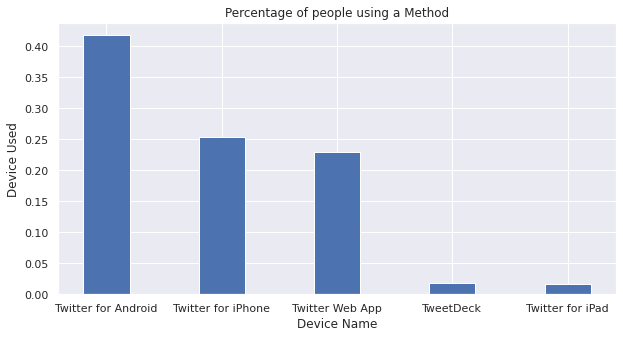

In [54]:
print("Top 5 methods used to post tweets\n")

device = list(sorted_dict.keys())[:5]
percentage = list(sorted_dict.values())[:5]

fig = plt.figure(figsize = (10, 5))

plt.bar(device, percentage, width = 0.4)
 
plt.xlabel("Device Name")
plt.ylabel("Device Used")
plt.title("Percentage of people using a Method")
plt.show()

- Sensitive vs Non-Sensitive Info

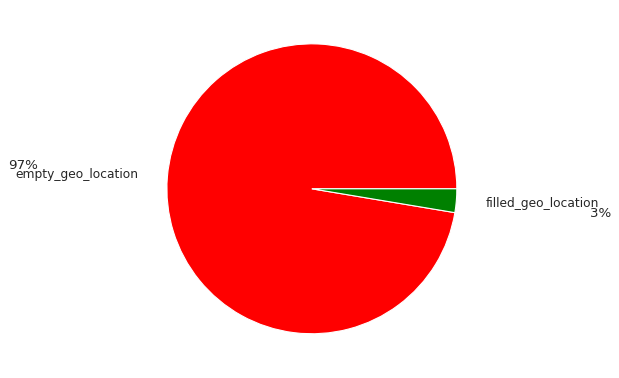

In [55]:
sensitive_count = {}

for index, row in tweets_data.iterrows():
  if row['sensitive'] in sensitive_count:
    sensitive_count[row['sensitive']] += 1
  else:
    sensitive_count[row['sensitive']] = 1

figure(figsize=(8, 6), dpi=80)
y = np.array([empty_geo_location, filled_geo_location])
mylabels = ["empty_geo_location", "filled_geo_location"]
mycolors = ["red", "green"]
plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.0f%%', pctdistance=2.0, labeldistance=1.2)
plt.show() 

- Tweet length

Text(0.5, 0, 'Length of Tweets')

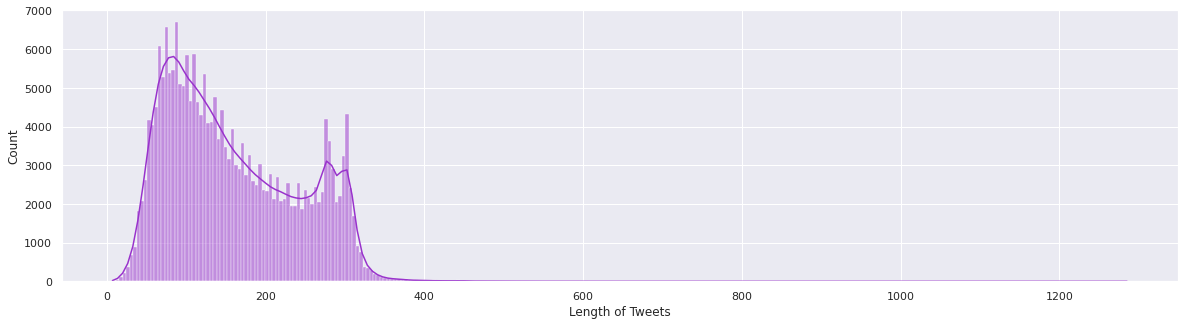

In [56]:
tweets = tweets_data['tweet']
tweets_len = []
for t in tweets:
    tweets_len.append(len(t))

fig, ax = plt.subplots(figsize=(20,5))
sns.set(style="darkgrid")
fig = sns.histplot(data=tweets_len, color="darkorchid", kde=True, ax=ax)
fig.set_xlabel("Length of Tweets")

- Number of hashtags in a tweet

Text(0.5, 0, 'Number of Hashtags')

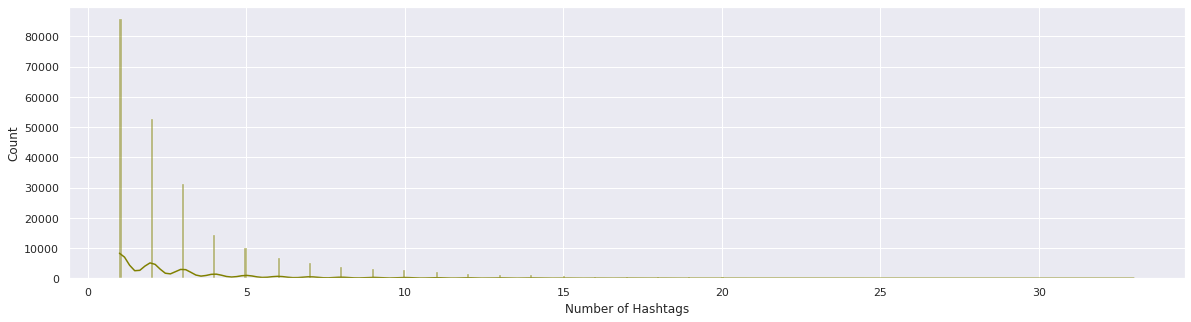

In [57]:
hashtags = tweets_data['hashtags'].tolist()
hashtags_len = []
for h in hashtags:
    hashtags_len.append(len(h.split(',')))
    
fig, ax = plt.subplots(figsize=(20,5))
sns.set(style="darkgrid")
fig = sns.histplot(data=hashtags_len, color="olive", kde=True, ax=ax)
fig.set_xlabel("Number of Hashtags")

- Proportion of tweets with urls

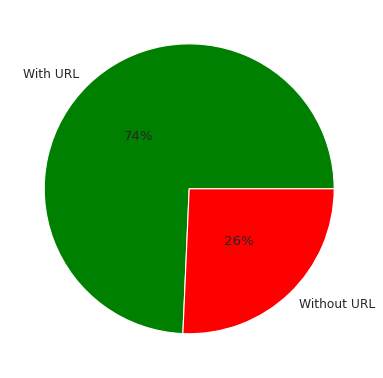

In [58]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
with_url = 0
for url in tweets_data['urls']:
    if url:
        with_url += 1

y = np.array([with_url, len(tweets_data) - with_url])
mylabels = ["With URL", "Without URL"]
mycolors = ["green", "red"]
plt.pie(y, labels = mylabels, colors = mycolors, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1)
plt.show() 

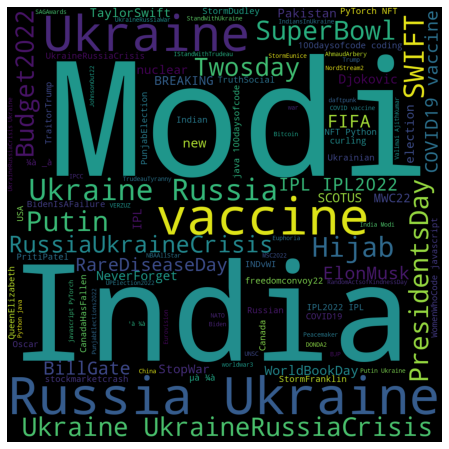

In [62]:
hashtags=set()
for index, row in tweets_data.iterrows():
    hashtags.add(row['hashtags'])

text = ','.join(hashtags)
wordcloud = WordCloud(width = 1000, height = 1000, 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [65]:
print(len(hashtags))

91425
